# Results analysis code

## Imports and matplotlib params

In [1]:
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd
from pathlib import Path
import glob
import os
from helpers import load_experiments

plt.rcParams.update({'font.size': 20})

# Also put tex font. This can be deactivated if a TeX compiler is not installed, but you will need to change the captions accordingly.

plt.rcParams.update({'text.usetex': True, "font.family": "sans-serif",})

## Load results from jsons

In [2]:
# Initialize an empty list to store data from all files
all_data = []

# Define experiment directory and mapping
experiments_base_path = '../experiments/'  # Replace with actual path
# CAREFUL : This path starts from the analysis directory, you might have to go back with '..'.

# First analysis, with topics
names_base = {
    'medicine': 'Drugs', # put the names of the experiment as index, and the display name as values.
    'drugs': 'Drugs',
    'genetics': 'Genetics',
    'crypto': 'Cryptography', 
    'nuclear': 'Nuclear physics'
}

# Second, with temperatures
names_temperature = { 
    'genetics': 'Genetics',
    'genetics-T06': 'Genetics', 
    'genetics-T05': 'Genetics', 
    'genetics-T04': 'Genetics', 
    'genetics-T03': 'Genetics', 
    'genetics-T02': 'Genetics', }

# For sizes, we can also quickly load the dict like such : 
glob_sizes = '../experiments/sizes/*'
names_sizes = {}

for exp in glob.glob(glob_sizes):
    folder_name = exp.split('/')[-1]
    names_sizes[folder_name] = folder_name.split('-')[0].capitalize() # knowing that the experiments names are like genetics-40m for 40M params model.

# Function to load JSON files and extract data from Version 2 structure

df = load_experiments(experiments_base_path, names_base)
df_genetics_temp_07 = df[(df['dataset'] == 'Genetics')]

df_temperature = load_experiments(experiments_base_path, names_temperature)

df_sizes = load_experiments(experiments_base_path + 'sizes/', names_sizes)
df_sizes = pd.concat([df_sizes, df_genetics_temp_07], ignore_index=True)

Processing experiment: medicine (40 files)
Processed 988 regions from medicine
Processing experiment: genetics (40 files)
Processed 1337 regions from genetics
Processing experiment: crypto (40 files)
Processed 1336 regions from crypto
Processing experiment: nuclear (40 files)
Processed 1040 regions from nuclear


/home/pilgrim/Documents/EPFL/HAIDI/HAIDI-Graphs/analysis/helpers.py:114: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.3' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['infinigram_count_adj'] == 0, 'infinigram_count_adj'] = 0.3


Processing experiment: genetics (40 files)
Processed 1337 regions from genetics
Processing experiment: genetics-T06 (40 files)
Processed 1913 regions from genetics-T06
Processing experiment: genetics-T05 (40 files)
Processed 3297 regions from genetics-T05
Processing experiment: genetics-T04 (40 files)
Processed 4523 regions from genetics-T04
Processing experiment: genetics-T03 (40 files)
Processed 6127 regions from genetics-T03
Processing experiment: genetics-T02 (40 files)
Processed 8787 regions from genetics-T02


/home/pilgrim/Documents/EPFL/HAIDI/HAIDI-Graphs/analysis/helpers.py:114: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.3' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['infinigram_count_adj'] == 0, 'infinigram_count_adj'] = 0.3


Processing experiment: genetics-160m (72 files)
Processed 3676 regions from genetics-160m
Processing experiment: genetics-1.4b (75 files)
Processed 2123 regions from genetics-1.4b
Processing experiment: genetics-2.8b (51 files)
Processed 1714 regions from genetics-2.8b
Processing experiment: genetics-410m (65 files)
Processed 2274 regions from genetics-410m
Processing experiment: genetics-1b (80 files)
Processed 2766 regions from genetics-1b
Processing experiment: genetics-70m (80 files)
Processed 8548 regions from genetics-70m


/home/pilgrim/Documents/EPFL/HAIDI/HAIDI-Graphs/analysis/helpers.py:114: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.3' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['infinigram_count_adj'] == 0, 'infinigram_count_adj'] = 0.3


In [3]:
df.head()

,file,experiment_name,dataset,prompt_id,generation_id,region_id,deduped,infinigram_count,standalone_perplexity,perplexity,...,text,temperature,model_name,in_prompt,is_contiguous,start_index,end_index,infinigram_approx,infinigram_count_adj,category
0,../experiments/medicine/perplexity_analysis/lo...,medicine,Drugs,P0031,P0031_G00,P0031_G00_R01,False,530,3070.821188,1.0,...,", paracetamol is",0.7,EleutherAI/pythia-6.9b,False,False,48,54,False,530.0,Frequently encountered text
1,../experiments/medicine/perplexity_analysis/lo...,medicine,Drugs,P0031,P0031_G01,P0031_G01_R01,False,0,3651.257105,1.0,...,of paracetamol on,0.7,EleutherAI/pythia-6.9b,False,False,10,16,False,0.3,Synthetic coherence
2,../experiments/medicine/perplexity_analysis/lo...,medicine,Drugs,P0031,P0031_G01,P0031_G01_R02,False,0,91.743315,1.0,...,paracetamol on the,0.7,EleutherAI/pythia-6.9b,False,True,11,17,False,0.3,Synthetic coherence
3,../experiments/medicine/perplexity_analysis/lo...,medicine,Drugs,P0031,P0031_G01,P0031_G01_R03,False,105397,35.545708,1.0,...,"-1β, IL-",0.7,EleutherAI/pythia-6.9b,False,False,27,33,False,105397.0,Frequently encountered text
4,../experiments/medicine/perplexity_analysis/lo...,medicine,Drugs,P0031,P0031_G01,P0031_G01_R04,False,76580,472.866282,1.0,...,"1β, IL-6",0.7,EleutherAI/pythia-6.9b,False,True,28,34,False,76580.0,Frequently encountered text


## Visualizations

### Distribution of counts per topic

This plots show violin plots of the number of counts for each topic.

/tmp/ipykernel_590426/845738966.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['infinigram_count'] > 0], x='dataset', y='infinigram_count', palette='Set2', showfliers=False)


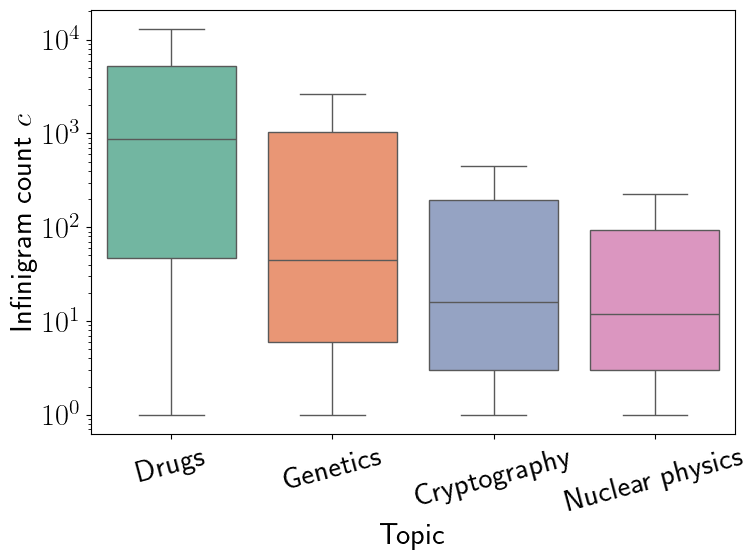

In [4]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[df['infinigram_count'] > 0], x='dataset', y='infinigram_count', palette='Set2', showfliers=False)

plt.xlabel('Topic', fontsize=22)
plt.ylabel('Infinigram count $c$', fontsize=22)

plt.yscale('log')
plt.xticks(rotation=15)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.tight_layout()

if not os.path.exists('figures'):
    os.makedirs('figures')
plt.savefig('figures/boxplot_datasets.svg')

plt.show()


### Average length of low-perplexity sequences
While the windows are of fixed-size 6 tokens, multiple sequences can be contiguous, leading to an overall longer low-perp. sequence. In order to compute the avg. length of low-perp sequence (that are at least 6 tokens), one can do the following : 

In [5]:
# Extract region number from region_id
df['region_num'] = df['region_id'].str.extract(r'R(\d+)').astype(int)

# Sort by dataset, temperature, and region number
df = df.sort_values(['dataset', 'temperature', 'region_num'])

# Group by dataset and temperature to process each separately
contiguous_lengths = []

for (dataset, temperature), group in df.groupby(['dataset', 'temperature']):
    dataset_df = group.copy()
    
    # Find contiguous sequences
    current_sequence = []
    sequences = []
    
    for idx, row in dataset_df.iterrows():
        if row['is_contiguous']: # If the region is contiguous to the last one, we add it to the current sequence
            current_sequence.append(row['region_num'])
        else:
            if current_sequence:
                sequences.append(current_sequence) # else we just add the previous sequence and create a new one. 
                current_sequence = []
            # Single non-contiguous region
            sequences.append([row['region_num']])
    
    # the last sequence if it ends with contiguous regions
    if current_sequence:
        sequences.append(current_sequence)
    
    # Calculate length for each sequence
    for seq in sequences:
        if len(seq) == 1:
            # Single region
            length = 6
        else:
            # Contiguous sequence: first region is 6, each additional adds 1
            length = 6 + (len(seq) - 1)
        
        contiguous_lengths.append({
            'dataset': dataset,
            'temperature': temperature,
            'sequence': seq,
            'length': length
        })

# Convert to DataFrame for easier analysis
results_df = pd.DataFrame(contiguous_lengths)

# Calculate statistics per dataset and temperature
stats_per_dataset_temp = results_df.groupby(['dataset', 'temperature'])['length'].agg(['mean', 'std', 'count']).reset_index()
stats_per_dataset_temp.columns = ['dataset', 'temperature', 'mean_length', 'std_length', 'num_sequences']

# Format the statistics with 0 digit rounding
stats_per_dataset_temp['mean_length'] = stats_per_dataset_temp['mean_length'].round(0)
stats_per_dataset_temp['std_length'] = stats_per_dataset_temp['std_length'].round(0)

print("Contiguous sequence lengths per dataset and temperature:")
print(stats_per_dataset_temp)

Contiguous sequence lengths per dataset and temperature:
           dataset  temperature  mean_length  std_length  num_sequences
0     Cryptography          0.7         10.0        14.0            270
1            Drugs          0.7          8.0         7.0            322
2         Genetics          0.7         11.0        19.0            212
3  Nuclear physics          0.7          9.0        10.0            262


### Scatter plot with regions

This plot creates a scatter plot for a topic, with y-axis being the standalone perplexity (pre-computed), and the other being the infinigram count (also pre-computed). 

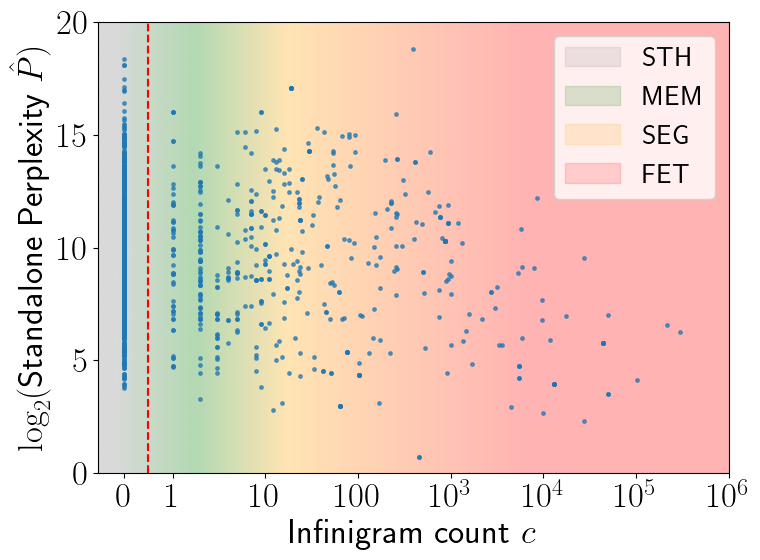

In [16]:
from helpers import plot_scatter_with_color_gradients

dataset_name = 'Cryptography'

df_plot = df[df['dataset'] == dataset_name].copy()

figname = f'figures/{dataset_name}_scatter.svg'

plot_scatter_with_color_gradients(df_plot, figname)


## Table results:

### Topics

This table shows the differences between the topics in terms of number of matches, counts and repetitions.

This can be put in a LateX format like such : 
```python
result = df_main.groupby('dataset').agg(
    avg_perplexity=('perplexity', 'mean'),
    total_low_perplexity_regions=('perplexity', 'count'),
    non_zero_counts=('infinigram_count', lambda x: (x > 0).sum()),
    in_prompt_ratio=('in_prompt', lambda x: f"{(100 * x.sum() / len(x)):.2g}\%")
).reset_index()  # Reset index to make 'dataset' a column

# Calculate percentage of non-zero counts
result['non_zero_percent'] = (result['non_zero_counts'] / result['total_low_perplexity_regions'] * 100).map('{:.2g}\\%'.format)

# Reorder columns
result = result[['dataset', 'total_low_perplexity_regions', 'non_zero_counts', 'non_zero_percent', 'in_prompt_ratio']]

# Add a row for all datasets combined
all_datasets_row = {
    'dataset': 'Total',
    'total_low_perplexity_regions': result['total_low_perplexity_regions'].sum(),
    'non_zero_counts': result['non_zero_counts'].sum(),
    'non_zero_percent': f"{(result['non_zero_counts'].sum() / result['total_low_perplexity_regions'].sum() * 100):.2g}\\%",
    'in_prompt_ratio': f"{(result['in_prompt_ratio'].str.rstrip('\\%').astype(float).mean()):.2g}\\%",
}

# Append the row to the result DataFrame
result = pd.concat([result, pd.DataFrame([all_datasets_row])], ignore_index=True)

# Set float format to 2 significant digits
print(result.to_latex(index=False, float_format="%.2g"))
```

In [7]:
result = df.groupby('dataset').agg(
    avg_perplexity=('perplexity', 'mean'),
    total_low_perplexity_regions=('perplexity', 'count'),
    non_zero_counts=('infinigram_count', lambda x: (x > 0).sum()),
    in_prompt_ratio=('in_prompt', lambda x: 100 * x.sum() / len(x))
).reset_index()  # Reset index to make 'dataset' a column

result['non_zero_percent'] = result['non_zero_counts'] / result['total_low_perplexity_regions'] * 100

# Reorder columns
result = result[['dataset', 'total_low_perplexity_regions', 'non_zero_counts', 'non_zero_percent', 'in_prompt_ratio']]

# Add a row for all datasets combined
all_datasets_row = {
    'dataset': 'Total',
    'total_low_perplexity_regions': result['total_low_perplexity_regions'].sum(),
    'non_zero_counts': result['non_zero_counts'].sum(),
    'non_zero_percent': result['non_zero_counts'].sum() / result['total_low_perplexity_regions'].sum() * 100,
    'in_prompt_ratio': result['in_prompt_ratio'].mean(),
}

# Append the row to the result DataFrame
result = pd.concat([result, pd.DataFrame([all_datasets_row])], ignore_index=True)

result

,dataset,total_low_perplexity_regions,non_zero_counts,non_zero_percent,in_prompt_ratio
0,Cryptography,1336,505,37.799401,31.811377
1,Drugs,988,659,66.700405,7.894737
2,Genetics,1337,481,35.976066,28.870606
3,Nuclear physics,1040,264,25.384615,14.519231
4,Total,4701,1909,40.608381,20.773988


In [8]:
# You might be interested in the percentage of repetitions among the sequence that do match at least once : 
print(df[df['infinigram_count'] > 0].groupby('dataset')['in_prompt'].mean())

dataset
Cryptography       0.318812
Drugs              0.083460
Genetics           0.135135
Nuclear physics    0.053030
Name: in_prompt, dtype: float64


### Categories
This table shows the proportion of each low-perp category among the topics.

In [9]:
result = df.groupby(['category', 'dataset']).agg(
    total_low_perplexity_regions=('perplexity', 'count')).reset_index('category')

# Reset index to make dataset a column
result = result.reset_index()
result = result.pivot(index='dataset', columns='category', values='total_low_perplexity_regions')
result.columns.name = None
result = result.div(result.sum(axis=1), axis=0) * 100
result = result[['Synthetic coherence','Memorization','Segmental replication','Frequently encountered text',]]
result.reset_index(inplace=True)
result

,dataset,Synthetic coherence,Memorization,Segmental replication,Frequently encountered text
0,Cryptography,62.200599,12.574850,11.452096,13.772455
1,Drugs,33.299595,8.198381,8.603239,49.898785
2,Genetics,64.023934,7.928197,10.620793,17.427076
3,Nuclear physics,74.615385,9.615385,7.788462,7.980769


In [10]:
result = df_temperature.groupby(['category', 'temperature']).agg(
    total_low_perplexity_regions=('perplexity', 'count')).reset_index('category')

# Reset index to make temperature a column
result = result.reset_index()
result = result.pivot(index='temperature', columns='category', values='total_low_perplexity_regions')
result.columns.name = None
result = result.div(result.sum(axis=1), axis=0) * 100
result = result[['Synthetic coherence','Memorization','Segmental replication','Frequently encountered text',]]
result.reset_index(inplace=True)
result

,temperature,Synthetic coherence,Memorization,Segmental replication,Frequently encountered text
0,0.2,66.905656,10.219643,10.367588,12.507113
1,0.3,68.695936,9.596866,10.053860,11.653338
2,0.4,67.698430,10.015476,11.651559,10.634535
3,0.5,66.909311,10.464058,9.220503,13.406127
4,0.6,65.551490,9.095661,12.127548,13.225301
5,0.7,64.023934,7.928197,10.620793,17.427076


In [11]:
result = df_temperature.groupby('temperature').agg(
    avg_perplexity=('perplexity', 'mean'),
    total_low_perplexity_regions=('perplexity', 'count'),
    non_zero_counts=('infinigram_count', lambda x: (x > 0).sum()),
    in_prompt_ratio=('in_prompt', lambda x: 100 * x.sum() / len(x))
).reset_index()  # Reset index to make 'temperature' a column

result['non_zero_percent'] = result['non_zero_counts'] / result['total_low_perplexity_regions'] * 100

# Reorder columns
result = result[['temperature', 'total_low_perplexity_regions', 'non_zero_counts', 'non_zero_percent', 'in_prompt_ratio']]

result

,temperature,total_low_perplexity_regions,non_zero_counts,non_zero_percent,in_prompt_ratio
0,0.2,8787,2908,33.094344,8.455673
1,0.3,6127,1918,31.304064,9.613188
2,0.4,4523,1461,32.301570,13.221313
3,0.5,3297,1091,33.090689,16.985138
4,0.6,1913,659,34.448510,16.204914
5,0.7,1337,481,35.976066,28.870606


## Interactive visualization

This visualization, done with plotly, allow to hover the low-perp region in the scatter plot and see what text they contain. This is very useful for exploration.

In [12]:
import plotly.express as px

# Create a scatter plot
fig = px.scatter(df[df['dataset'] == 'Nuclear physics'], x='infinigram_count_adj', y='standalone_perplexity', color='deduped',
                 title='Scatter Plot of Infinigram Count vs Perplexity for All Dataset',
                 labels={'infinigram_count': 'Infinigram Count', 'perplexity': 'Perplexity'},
                 hover_data=['text'])

fig.update_xaxes(type='log')
fig.update_yaxes(type='log')

fig.update_layout({'width': 1200, 'height': 800})

# Show the plot
fig.show()

## Model sizes

This codes format correctly their sizes and display information about their counts and repetitions.

In [13]:
result = df_sizes[df_sizes['standalone_perplexity'] != float('inf')].groupby('experiment_name').agg(
    avg_perplexity=('standalone_perplexity', lambda x: f"{np.log(x.mean()):.2g}"),
    total_low_perplexity_regions=('perplexity', 'count'),
    non_zero_counts=('infinigram_count', lambda x: (x > 0).sum()),
    in_prompt_ratio=('in_prompt', lambda x: f"{(x.sum()):.0f}")
)


# Calculate percentage of non-zero counts
result['non_zero_percent'] = result['non_zero_counts'] / result['total_low_perplexity_regions'] * 100

# Reorder columns
result= result.reset_index()
result['size'] = result['experiment_name'].apply(lambda name: name.split('-')[1] if '-' in name else '6.8b')
result['size'] = result['size'].apply(lambda text: float(text[:-1]) * 1e3 if 'b' in text.lower() else float(text[:-1]))
result.sort_values(by='size', inplace=True)
result['name'] = result['experiment_name'].apply(lambda name: name.split('-')[1].replace('m', 'M').replace('b', 'B') if '-' in name else '6.8B')
result = result[['name', 'size', 'total_low_perplexity_regions', 'non_zero_counts', 'non_zero_percent', 'in_prompt_ratio', 'avg_perplexity']]

result

,name,size,total_low_perplexity_regions,non_zero_counts,non_zero_percent,in_prompt_ratio,avg_perplexity
6,70M,70.0,8528,2874,33.700750,118,9.2
2,160M,160.0,3676,1306,35.527748,428,8.4
5,410M,410.0,2274,716,31.486368,470,8.4
3,1B,1000.0,2766,878,31.742589,752,8.6
1,1.4B,1400.0,2123,673,31.700424,334,8.2
4,2.8B,2800.0,1714,488,28.471412,402,8.6
0,6.8B,6800.0,1337,481,35.976066,386,8.5


In [14]:
result.sort_values('size')

,name,size,total_low_perplexity_regions,non_zero_counts,non_zero_percent,in_prompt_ratio,avg_perplexity
6,70M,70.0,8528,2874,33.700750,118,9.2
2,160M,160.0,3676,1306,35.527748,428,8.4
5,410M,410.0,2274,716,31.486368,470,8.4
3,1B,1000.0,2766,878,31.742589,752,8.6
1,1.4B,1400.0,2123,673,31.700424,334,8.2
4,2.8B,2800.0,1714,488,28.471412,402,8.6
0,6.8B,6800.0,1337,481,35.976066,386,8.5
